<a href="https://colab.research.google.com/github/LeeTae-hyun/GIS_Python/blob/master/Lab_geometric__operaions(%EC%A4%91%EC%B2%A9%EB%B6%84%EC%84%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 13.1 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups
%matplotlib inline
from pyproj import CRS

In [ ]:
border_fp = "/content/drive/MyDrive/몰룽?/Helsinki/Helsinki_borders.shp"
grid_fp = "/content/drive/MyDrive/몰룽?/Helsinki/TravelTimes_to_5975375_RailwayStation.shp"

grid = gpd.read_file(grid_fp)
hel = gpd.read_file(border_fp)

<AxesSubplot:>

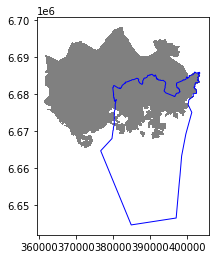

In [ ]:
ax = grid.plot(facecolor='gray')
hel.plot(ax=ax, facecolor='None', edgecolor='blue')

In [ ]:
print(hel.crs)

EPSG:3067


In [ ]:
assert hel.crs == grid.crs

In [ ]:
print(grid.crs)

EPSG:3067


<AxesSubplot:>

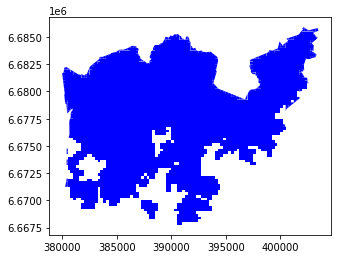

In [ ]:
intersection = gpd.overlay(grid, hel, how='intersection')
intersection.plot(color='b')

In [ ]:
intersection.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402024.224 6685750.000, 402003.328 6..."
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402250.000 6..."
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403148.515 6685750.000, 403243.781 6..."
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403250.000 6..."
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((401900.425 6685500.000, 402000.000 6..."


In [ ]:
dissolved = intersection.dissolve(by="car_r_t")
dissolved.head()

,geometry,car_m_d,car_m_t,car_r_d,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE
car_r_t,,,,,,,,,,,,,,,,,,
-1,"MULTIPOLYGON (((384750.000 6670000.000, 384500...",-1,-1,-1,5913094,-1,-1,-1,-1,-1,-1,-1,-1,-1,27517366,Helsinki,Helsingfors,091
0,"POLYGON ((385750.000 6672000.000, 385750.000 6...",0,0,0,5975375,0,0,0,0,0,0,5975375,0,0,27517366,Helsinki,Helsingfors,091
7,"POLYGON ((386250.000 6671750.000, 386000.000 6...",1051,7,1051,5973739,617,5,6,617,5,6,5975375,448,6,27517366,Helsinki,Helsingfors,091
8,"MULTIPOLYGON (((386000.000 6671500.000, 385750...",1286,8,1286,5973736,706,10,10,706,10,10,5975375,706,10,27517366,Helsinki,Helsingfors,091
9,"MULTIPOLYGON (((385000.000 6671250.000, 385000...",1871,9,1871,5970457,1384,11,13,1394,11,12,5975375,1249,18,27517366,Helsinki,Helsingfors,091


In [ ]:
print(f'Rows in original intersection GeoDataFrame: {len(intersection)}')
print(f'Rows in dissolved layer: {len(dissolved)}')

Rows in original intersection GeoDataFrame: 3826
Rows in dissolved layer: 51


In [ ]:
dissolved.columns

Index(['geometry', 'car_m_d', 'car_m_t', 'car_r_d', 'from_id', 'pt_m_d',
       'pt_m_t', 'pt_m_tt', 'pt_r_d', 'pt_r_t', 'pt_r_tt', 'to_id', 'walk_d',
       'walk_t', 'GML_ID', 'NAMEFIN', 'NAMESWE', 'NATCODE'],
      dtype='object')

In [ ]:
dissolved.index

Int64Index([-1,  0,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
            39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
            56],
           dtype='int64', name='car_r_t')

In [ ]:
dissolved.loc[15]

geometry    MULTIPOLYGON (((384000.00013620744 6670750.000...
car_m_d                                                  7458
car_m_t                                                    13
car_r_d                                                  7458
from_id                                               5934913
pt_m_d                                                   6858
pt_m_t                                                     26
pt_m_tt                                                    30
pt_r_d                                                   6858
pt_r_t                                                     27
pt_r_tt                                                    32
to_id                                                 5975375
walk_d                                                   6757
walk_t                                                     97
GML_ID                                               27517366
NAMEFIN                                              Helsinki
NAMESWE 

In [ ]:
type(dissolved.loc[15])

pandas.core.series.Series

In [ ]:
dissolved.loc[15].head()

geometry    MULTIPOLYGON (((384000.00013620744 6670750.000...
car_m_d                                                  7458
car_m_t                                                    13
car_r_d                                                  7458
from_id                                               5934913
Name: 15, dtype: object

In [ ]:
selection = gpd.GeoDataFrame([dissolved.loc[15]], crs=dissolved.crs)

<AxesSubplot:>

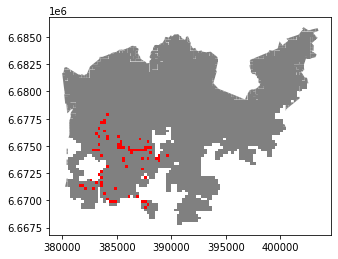

In [ ]:
ax = dissolved.plot(facecolor='gray')
selection.plot(ax=ax, facecolor='red')

In [ ]:
dissolved = dissolved.reset_index()
dissolved.head()

,car_r_t,geometry,car_m_d,car_m_t,car_r_d,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE
0,-1,"MULTIPOLYGON (((384750.000 6670000.000, 384500...",-1,-1,-1,5913094,-1,-1,-1,-1,-1,-1,-1,-1,-1,27517366,Helsinki,Helsingfors,091
1,0,"POLYGON ((385750.000 6672000.000, 385750.000 6...",0,0,0,5975375,0,0,0,0,0,0,5975375,0,0,27517366,Helsinki,Helsingfors,091
2,7,"POLYGON ((386250.000 6671750.000, 386000.000 6...",1051,7,1051,5973739,617,5,6,617,5,6,5975375,448,6,27517366,Helsinki,Helsingfors,091
3,8,"MULTIPOLYGON (((386000.000 6671500.000, 385750...",1286,8,1286,5973736,706,10,10,706,10,10,5975375,706,10,27517366,Helsinki,Helsingfors,091
4,9,"MULTIPOLYGON (((385000.000 6671250.000, 385000...",1871,9,1871,5970457,1384,11,13,1394,11,12,5975375,1249,18,27517366,Helsinki,Helsingfors,091


<AxesSubplot:>

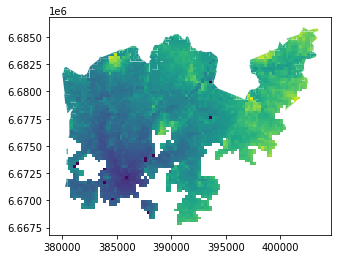

In [ ]:
dissolved.plot(column="car_r_t")

여기까지 중첩분석.

----------------------------------------------

In [ ]:
grid_fp = "/content/drive/MyDrive/몰룽?/dataE5/dataE5/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = "/content/drive/MyDrive/몰룽?/dataE5/dataE5/roads.shp"
metro_fp = "/content/drive/MyDrive/몰룽?/dataE5/dataE5/metro.shp"

In [ ]:
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [ ]:
print(roads.crs)
print(metro.crs)
print(grid.crs)

EPSG:2392
EPSG:2392
EPSG:3067


In [ ]:
print(f"Roads crs: {CRS(roads.crs).name}")
print(f"Metro crs: {CRS(metro.crs).name}")
print(f"Grid crs: {CRS(grid.crs).name}")

Roads crs: KKJ / Finland zone 2
Metro crs: KKJ / Finland zone 2
Grid crs: ETRS89 / TM35FIN(E,N)


In [ ]:
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)

In [ ]:
roads.crs == metro.crs == grid.crs

True

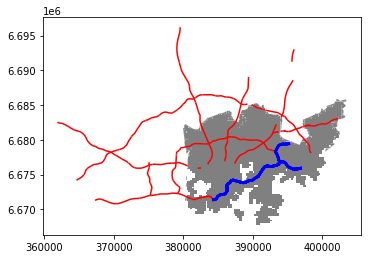

In [ ]:
ax = dissolved.plot(facecolor='gray')
roads.plot(ax=ax, color="red", linewidth=1.5)
metro.plot(ax=ax, color="blue", linewidth=2.5)

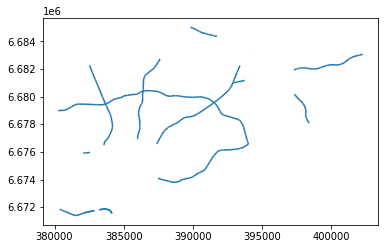

In [ ]:
inters2 = gpd.overlay(roads, dissolved, how='intersection')
inters2.plot()

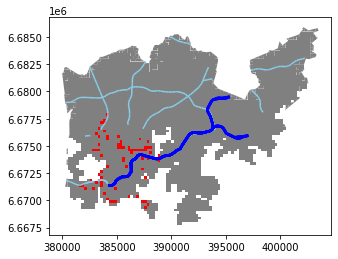

In [ ]:
ax = dissolved.plot(facecolor='gray')
inters2.plot(ax=ax, color="skyblue", linewidth=1.5)
metro.plot(ax=ax, color="blue", linewidth=2.5)
selection.plot(ax=ax, facecolor='red')